In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [99]:
churn = pd.read_csv('data/churn.csv')
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                50000 non-null  float64
 1   avg_rating_by_driver    49799 non-null  float64
 2   avg_rating_of_driver    41878 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   city                    50000 non-null  object 
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   signup_date             50000 non-null  object 
 8   surge_pct               50000 non-null  float64
 9   trips_in_first_30_days  50000 non-null  int64  
 10  luxury_car_user         50000 non-null  bool   
 11  weekday_pct             50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [100]:
churn.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [101]:
churn['phone'].unique()

array(['iPhone', 'Android', nan], dtype=object)

In [102]:
avg_avg_rating_of_driver = np.mean(churn['avg_rating_of_driver'])
avg_avg_rating_by_driver = np.mean(churn['avg_rating_by_driver'])

In [103]:
churn['avg_rating_by_driver'] = churn['avg_rating_by_driver'].apply(
lambda x: avg_avg_rating_by_driver if np.isnan(x) else x)

In [104]:
churn['avg_rating_of_driver'] = churn['avg_rating_of_driver'].apply(
lambda x: avg_avg_rating_of_driver if np.isnan(x) else x)

In [105]:
churn = churn.dropna()
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                49604 non-null  float64
 1   avg_rating_by_driver    49604 non-null  float64
 2   avg_rating_of_driver    49604 non-null  float64
 3   avg_surge               49604 non-null  float64
 4   city                    49604 non-null  object 
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   signup_date             49604 non-null  object 
 8   surge_pct               49604 non-null  float64
 9   trips_in_first_30_days  49604 non-null  int64  
 10  luxury_car_user         49604 non-null  bool   
 11  weekday_pct             49604 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [106]:
type(churn['last_trip_date'][1])

str

In [107]:
churn['signup_date'] = pd.to_datetime(churn['signup_date'], format='%Y-%m-%d')
churn['last_trip_date'] = pd.to_datetime(churn['last_trip_date'], format='%Y-%m-%d')

In [108]:
type(churn['last_trip_date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [109]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   avg_dist                49604 non-null  float64       
 1   avg_rating_by_driver    49604 non-null  float64       
 2   avg_rating_of_driver    49604 non-null  float64       
 3   avg_surge               49604 non-null  float64       
 4   city                    49604 non-null  object        
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   signup_date             49604 non-null  datetime64[ns]
 8   surge_pct               49604 non-null  float64       
 9   trips_in_first_30_days  49604 non-null  int64         
 10  luxury_car_user         49604 non-null  bool          
 11  weekday_pct             49604 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [110]:
churn['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [111]:
churn['luxury_car_user'] = churn['luxury_car_user'].astype(int)

In [112]:
churn.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4


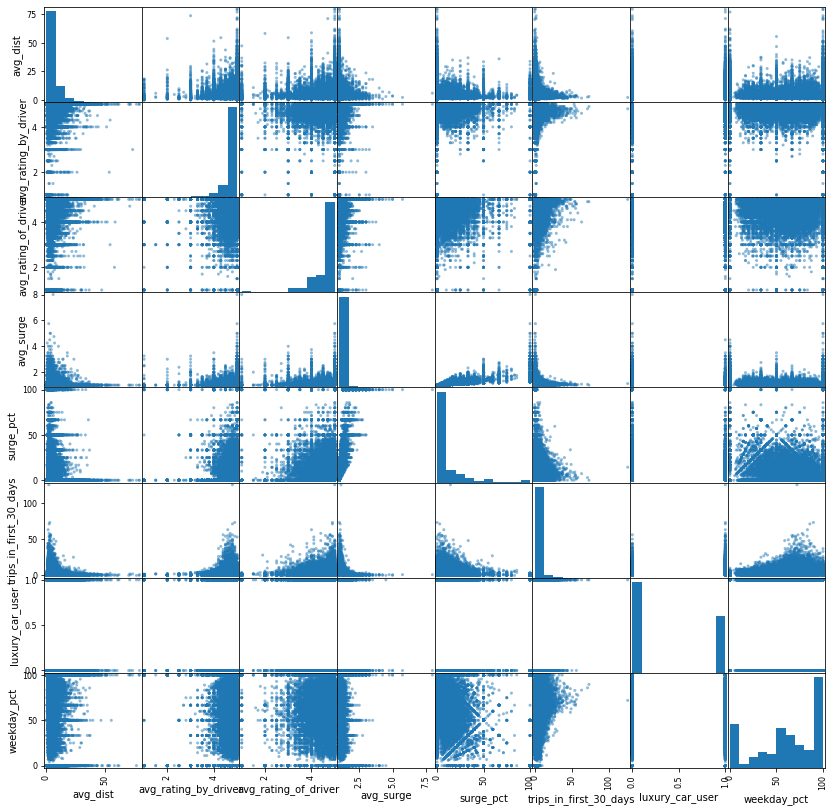

In [81]:
pd.plotting.scatter_matrix(churn,
                          figsize=(14,14));

In [82]:
t = datetime.strptime('2014-06-01', '%Y-%m-%d')
t2 = datetime.strptime('2014-06-02', '%Y-%m-%d')
t3 = datetime.strptime('2014-06-01', '%Y-%m-%d')
print(t, t2)
print(t > t2)
print(t <= t3)

2014-06-01 00:00:00 2014-06-02 00:00:00
False
True


In [83]:
(churn[churn['last_trip_date'] < t]).count()

avg_dist                  24410
avg_rating_by_driver      24410
avg_rating_of_driver      24410
avg_surge                 24410
city                      24410
last_trip_date            24410
phone                     24410
signup_date               24410
surge_pct                 24410
trips_in_first_30_days    24410
luxury_car_user           24410
weekday_pct               24410
dtype: int64

In [88]:
churn_date = datetime.strptime('2014-06-01', '%Y-%m-%d')
churn['churn?'] = (churn['last_trip_date'] < churn_date).astype(int)
churn['recent_signup'] = (churn['signup_date'] >= churn_date).astype(int)

In [89]:
churn.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn?,recent_signup
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,0,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,1,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,1,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,0,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,1,0


In [90]:
(churn[churn['recent_signup'] == 1]).count()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
luxury_car_user           0
weekday_pct               0
churn?                    0
recent_signup             0
dtype: int64

In [113]:
def clean_churn_data(data):
    
    churn = data.copy()
    
    # fix nan in numeric features
    avg_avg_rating_of_driver = np.mean(churn['avg_rating_of_driver'])
    avg_avg_rating_by_driver = np.mean(churn['avg_rating_by_driver'])
    churn['avg_rating_by_driver'] = churn['avg_rating_by_driver'].apply(
        lambda x: avg_avg_rating_by_driver if np.isnan(x) else x)
    churn['avg_rating_of_driver'] = churn['avg_rating_of_driver'].apply(
        lambda x: avg_avg_rating_of_driver if np.isnan(x) else x)
    
    # remove remaining nan
    churn = churn.dropna()
    
    # convert to datetime
    churn['signup_date'] = pd.to_datetime(churn['signup_date'], format='%Y-%m-%d')
    churn['last_trip_date'] = pd.to_datetime(churn['last_trip_date'], format='%Y-%m-%d')
    
    # convert boolean to int
    churn['luxury_car_user'] = churn['luxury_car_user'].astype(int)
    
    # add churn column
    churn_date = datetime.strptime('2014-06-01', '%Y-%m-%d')
    churn['churn?'] = (churn['last_trip_date'] < churn_date).astype(int)
    
    return churn

In [114]:
churn2 = pd.read_csv('data/churn.csv')
churn2 = clean_churn_data(churn2)
churn2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   avg_dist                49604 non-null  float64       
 1   avg_rating_by_driver    49604 non-null  float64       
 2   avg_rating_of_driver    49604 non-null  float64       
 3   avg_surge               49604 non-null  float64       
 4   city                    49604 non-null  object        
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   signup_date             49604 non-null  datetime64[ns]
 8   surge_pct               49604 non-null  float64       
 9   trips_in_first_30_days  49604 non-null  int64         
 10  luxury_car_user         49604 non-null  int64         
 11  weekday_pct             49604 non-null  float64       
 12  churn?                  49604 non-null  int64 

In [115]:
churn2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn?
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,1
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,1


In [126]:
from data.clean_churn_data import clean_churn_data as ccd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [144]:
churn3 = pd.read_csv('data/churn.csv')
churn3 = ccd(churn3)
churn3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                49604 non-null  float64
 1   avg_rating_by_driver    49604 non-null  float64
 2   avg_rating_of_driver    49604 non-null  float64
 3   avg_surge               49604 non-null  float64
 4   phone                   49604 non-null  int64  
 5   surge_pct               49604 non-null  float64
 6   trips_in_first_30_days  49604 non-null  int64  
 7   luxury_car_user         49604 non-null  int64  
 8   weekday_pct             49604 non-null  float64
 9   city: Astapor           49604 non-null  int64  
 10  city: King's Landing    49604 non-null  int64  
 11  city: Winterfell        49604 non-null  int64  
 12  churn?                  49604 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 5.3 MB


In [145]:
churn3['city: Astapor'].unique()

array([0, 1])